In [247]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [151]:
#Open the page and grab the relevant HTML
mainpageadd = 'https://www.hockey-reference.com/leagues/NHL_2018_games.html'
mainpage = urlopen(mainpageadd)
soup = BeautifulSoup(mainpage)

In [182]:
#Grab the table with all the games
gamesTable = soup.find(id='games')
Date =[]
Vis=[]
VG=[]
Home=[]
HG=[]
OT=[]
Att=[]
LOG=[]
Notes=[]

#Create a table with a list for each column of data
headers = [Date, Vis, VG, Home, HG, OT, Att, LOG, Notes]

#Iterate through each row and column, assigning the corresponding data to the location in 'headers'
for row in gamesTable.findAll('tr'):
    cells = row.findAll(['td','th'])
    index = np.arange(0,len(cells)).tolist()
    for num in index:
        headers[num].append(cells[num].find(text=True))

#Create the games Dataframe, set the column names to names instead of index values
gamesDf = pd.DataFrame(headers).transpose()
gamesDf.columns = gamesDf.iloc[0]
gamesDf = gamesDf.reindex(gamesDf.index.drop(0))


In [194]:
#Create a Dataframe with only games that have been played
gamesDf['LOG'].replace('None', np.nan)
gamesDf.dropna(subset=['LOG'], inplace=True)

In [213]:
#Dictionary of team names and abbreviations. VEG is used instead of VGK.
teamAbvs = {'Anaheim Ducks':'ANA', 'Arizona Coyotes':'ARI', 'Boston Bruins': 'BOS', 'Buffalo Sabres':'BUF', 'Carolina Hurricanes':'CAR',
            'Calgary Flames':'CGY', 'Chicago Blackhawks':'CHI', 'Columbus Blue Jackets':'CBJ', 'Colorado Avalanche':'COL', 'Dallas Stars':'DAL',
           'Detroit Red Wings':'DET', 'Edmonton Oilers':'EDM', 'Florida Panthers':'FLA', 'Los Angeles Kings':'LAK',
           'Minnesota Wild':'MIN', 'Montreal Canadiens':'MTL', 'Nashville Predators':'NSH', 'New Jersey Devils':'NJD',
           'New York Islanders':'NYI', 'New York Rangers':'NYR', 'Ottawa Senators':'OTT', 'Philadelphia Flyers':'PHI',
           'Pittsburgh Penguins':'PIT', 'San Jose Sharks':'SJS', 'St. Louis Blues':'STL', 'Tampa Bay Lightning':'TBL',
           'Toronto Maple Leafs':'TOR','Vancouver Canucks':'VAN', 'Vegas Golden Knights':'VEG', 'Washington Capitals':'WSH', 'Winnipeg Jets':'WPG',
           }

In [236]:
#Open a page for every game played, and check the penalty table for slashing calls
gamesPlayed2017 = np.arange(1,gamesDf['Date'].count()).tolist()
#Initialize the lists
slashingTotal2017 = []
slashesInGame2017 = []
slashingInt2017 = 0
for game in gamesPlayed2017:
    #Creating html string using gamesDf dataframe
    abv = teamAbvs[gamesDf['Home'][game]]
    daystr = ''.join(gamesDf['Date'][game].split('-'))
    gamestr = (daystr+'0'+abv)
    gamepage = ('https://www.hockey-reference.com/boxscores/'+gamestr+'.html')
    openedgame = urlopen(gamepage)
    gamesoup = BeautifulSoup(openedgame)    
    penaltytable = gamesoup.find(id='penalty')
    slashingInGame2017 = 0
    #Going through the penalty entries to find slashing calls
    for row in penaltytable.findAll('td'):
        rowtext = row.get_text().split()
        if 'Slashing' in rowtext:
            slashingInGame2017 += 1
    #Adding relevant entries to each list
    slashingInt2017 += slashingInGame2017
    slashingTotal2017.append(slashingInt2017)
    slashesInGame2017.append(slashingInGame2017)    

In [240]:
slashingDict2017 = {'Calls in Game': slashesInGame2017, 'Total Calls':slashingTotal2017}

In [243]:
slashDf2017 = pd.DataFrame(slashingDict2017)
slashDf2017.index.name = 'Games'

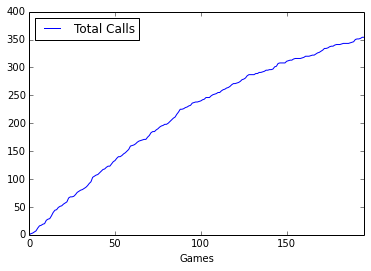

In [257]:
slashDf2017.plot(y='Total Calls', use_index='True')